## Hands-On PCA on Soil Moisture Data Programming Assignment 

In this lab, you will work with the "pueblo" dataset, which includes soil data for moisture and temperature. You will focus on the soil moisture data, perform feature standardization, and apply Principal Component Analysis (PCA) to reduce the dimensionality of the data. Finally, you will calculate the explained variance ratio for the principal components.

The lab is similar to the example where we performed PCA on soil temperature data.

First, import the following libraries: 

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow

# Importing the libraries for PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Then, we'll import the dataset.

In [2]:
# Reading dataset

df = pd.read_parquet('pueblo.parquet')
df.head()

,date,precip,max_temp,min_temp,gwl,sm_20cm,st_20cm,sm_50cm,st_50cm,sm_100cm,st_100cm,daily_discharge_cfs
85,2010-02-14,0.0,36,13,20.52,0.205500,0.408333,0.182875,1.320833,0.135333,3.700000,136.0
86,2010-02-15,0.0,41,7,20.51,0.215333,0.595833,0.183292,1.445833,0.137250,3.625000,129.0
87,2010-02-16,0.0,43,8,20.51,0.210417,0.500000,0.183625,1.495833,0.136583,3.700000,130.0
88,2010-02-17,0.0,51,10,20.51,0.209708,0.500000,0.184667,1.437500,0.135625,3.645833,132.0
89,2010-02-18,0.0,51,16,20.50,0.210542,0.637500,0.185125,1.479167,0.135333,3.708333,135.0


In [3]:
df.columns

Index(['date', 'precip', 'max_temp', 'min_temp', 'gwl', 'sm_20cm', 'st_20cm',
       'sm_50cm', 'st_50cm', 'sm_100cm', 'st_100cm', 'daily_discharge_cfs'],
      dtype='object')

# Part 1

In the dataset, we have 3 different types of soil moisture data which correspond to soil moisture depth at 20cm, 50cm, 100cm. In this part, you will create a feature list for the soil moisture data and standardize the features. 

In [4]:
# Part 1: Create feature list for soil moisture data
X = df[['sm_20cm', 'sm_50cm', 'sm_100cm']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled output
X_scaled[:5]  # Preview the first 5 rows

print(X_scaled.shape)

(4881, 3)


In [5]:
assert (X_scaled.shape == (4881, 3), "The dimensions of your scaled dataset are not correct. Be sure to only include the soil moisture data in your dataframe.")

# Part 2

Now, apply PCA to reduce the dimensionality of the standardized soil moisture data, specifying three principal components. You will also need to calculate the explained variance ratio for each of the three principal components to understand how much variance each component captures.

If you have completed the PCA correctly, you should generate a graph similar to the following: 

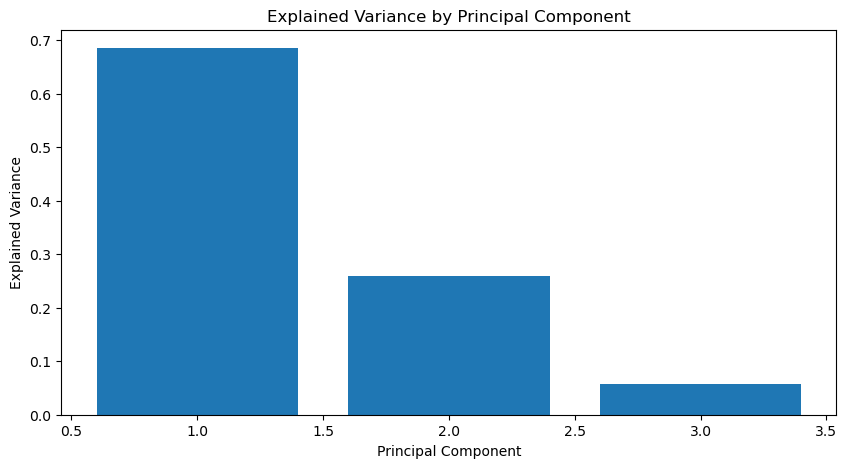

In [6]:
# Part 2: Apply PCA with 3 components
pca = PCA(n_components=3)

# Fit and transform the standardized data
principalComponents = pca.fit_transform(X_scaled)

# Create a DataFrame for the principal components
principalDf = pd.DataFrame(data=principalComponents, 
                           columns=['PC1', 'PC2', 'PC3'])

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print results
print("Explained Variance Ratio for each component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.2f}")

# Check the principal component DataFrame
principalDf.head()


Explained Variance Ratio for each component:
PC1: 0.68
PC2: 0.26
PC3: 0.06


,PC1,PC2,PC3
0,1.252575,-2.095674,-0.361339
1,1.432428,-2.164119,-0.207372
2,1.357716,-2.122449,-0.292576
3,1.350591,-2.146373,-0.335211
4,1.365871,-2.167628,-0.336040


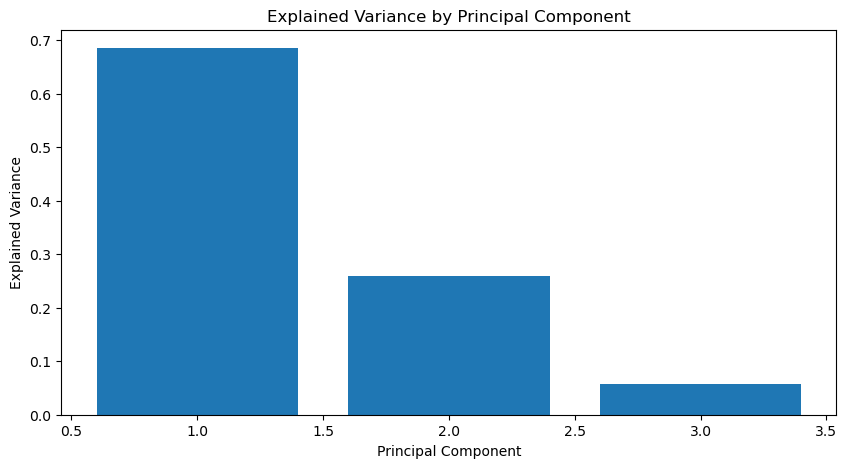

In [7]:
# Plotting the explained variance as bar plot
plt.figure(figsize=(10,5))
plt.bar(range(1,4), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.show()

# Part 3

In the graph above, Principal Component 1 (PC1) explains roughly 70% of the variance in soil moisture data. What does this mean? 

A. Variance shows how far apart data points are, so PC1 cannot represent the data because it doesn’t account for all of these differences. 

B. Variance, in the context of principal component analysis (PCA), measures how much the data points differ from    the mean of the dataset, indicating the spread or distribution of the data. Since PC1 captures the most significant variability, it effectively summarizes the key patterns, making it suitable for representing the data. 

C. Variance counts the total number of data points, so PC1 should be combined with other components for accurate representation.

D. Variance is unrelated to data representation, making PC1 insufficient on its own.

In [8]:
# Add the correct response option to `correct_answer` below. 
# Your answer should look like the following: correct_answer = 'E'

correct_answer = 'B'
